# Problématique métier

Le but est de prédire le nombre de cas de dengue en fonction de la ville, météorologie, etc...


# Préparation des données

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#pd.set_option('max_columns', None)

In [20]:
raw_data = pd.read_csv("input/dengue_features_train.csv", ",")

D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
# Regarder dans la base
raw_data.head() # afficher les 5 premières lignes

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [22]:
print(raw_data.shape)
raw_data.info()

(1456, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float6

In [23]:
# Chargement de la target
raw_y = pd.read_csv("input/dengue_labels_train.csv", ",")

D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
print(raw_y.shape)
raw_y.info()

(1456, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [25]:
remove_list = ['city', 'year', 'weekofyear']
y = raw_y.drop(columns=remove_list)
raw_data = raw_data.drop(columns=remove_list)
raw_data = raw_data.drop(columns=['week_start_date']) # Suppression de la week_start_date

In [26]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   total_cases  1456 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [27]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ndvi_ne                                1262 non-null   float64
 1   ndvi_nw                                1404 non-null   float64
 2   ndvi_se                                1434 non-null   float64
 3   ndvi_sw                                1434 non-null   float64
 4   precipitation_amt_mm                   1443 non-null   float64
 5   reanalysis_air_temp_k                  1446 non-null   float64
 6   reanalysis_avg_temp_k                  1446 non-null   float64
 7   reanalysis_dew_point_temp_k            1446 non-null   float64
 8   reanalysis_max_air_temp_k              1446 non-null   float64
 9   reanalysis_min_air_temp_k              1446 non-null   float64
 10  reanalysis_precip_amt_kg_per_m2        1446 non-null   float64
 11  rean

## Recherche des valeurs manquantes

In [28]:
# nombre de valeurs manquantes
print(raw_data.isnull().sum().sort_values(ascending=False))

ndvi_ne                                  194
ndvi_nw                                   52
station_diur_temp_rng_c                   43
station_avg_temp_c                        43
station_precip_mm                         22
ndvi_sw                                   22
ndvi_se                                   22
station_max_temp_c                        20
station_min_temp_c                        14
precipitation_amt_mm                      13
reanalysis_sat_precip_amt_mm              13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_relative_humidity_percent      10
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
reanalysis_precip_amt_kg_per_m2           10
dtype: int64


Après analyse, nous allons enlever le scheme_name

In [29]:
# Proportion de valeurs manquantes
columns_to_imput = raw_data.isnull().columns
columns_to_imput = columns_to_imput.to_list()
columns_to_imput

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

# Imputation & Sélection des variables explicatives

### Imputation

Après analyse des valeures manquantes : 
* Toutes les valeurs sont des floats, donc on prend la median

In [30]:
from sklearn.impute import SimpleImputer

columns = columns_to_imput
raw_data_conv = raw_data
imputer = SimpleImputer(missing_values=np.nan, strategy='mean').fit(raw_data_conv[columns])

# mean (=moyenne), most_frequent (=mode), median

data_impute = imputer.transform(raw_data_conv[columns].values)

data_impute_auto_float = pd.DataFrame(data_impute, columns = columns)

print(data_impute_auto_float)
print(data_impute_auto_float.info())

data_impute_auto_float.describe()

D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


       ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
0     0.122600  0.103725  0.198483  0.177617                 12.42   
1     0.169900  0.142175  0.162357  0.155486                 22.82   
2     0.032250  0.172967  0.157200  0.170843                 34.54   
3     0.128633  0.245067  0.227557  0.235886                 15.36   
4     0.196200  0.262200  0.251200  0.247340                  7.52   
...        ...       ...       ...       ...                   ...   
1451  0.342750  0.318900  0.256343  0.292514                 55.30   
1452  0.160157  0.160371  0.136043  0.225657                 86.47   
1453  0.247057  0.146057  0.250357  0.233714                 58.94   
1454  0.333914  0.245771  0.278886  0.325486                 59.67   
1455  0.298186  0.232971  0.274214  0.315757                 63.22   

      reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0                297.572857             297.742857   
1                298.211429             298.442857 

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,0.130827,0.117835,0.073299,0.083266,43.519806,1.357730,1.257372,1.522551,3.223466,2.556533,43.284882,7.129271,43.519806,1.537184,3.534237,1.273108,2.096879,1.945806,1.566475,47.095179
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,0.055625,0.051367,0.155625,0.144718,9.960000,297.665000,298.264286,294.130357,301.000000,293.900000,13.200000,77.226429,9.960000,15.561429,2.328571,26.328571,6.528571,31.100000,21.100000,8.850000
50%,0.142294,0.128067,0.196998,0.190993,38.710000,298.662143,299.267857,295.625714,302.500000,296.200000,27.370000,80.369286,38.710000,17.065000,2.864286,27.385714,7.385714,32.800000,22.200000,24.450000
75%,0.229292,0.212325,0.247021,0.246082,70.047500,299.827500,300.207143,296.456071,305.500000,297.900000,52.042500,86.041429,70.047500,17.974643,7.553571,28.128571,9.500000,33.900000,23.300000,53.600000
max,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [31]:
data_impute_auto_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ndvi_ne                                1456 non-null   float64
 1   ndvi_nw                                1456 non-null   float64
 2   ndvi_se                                1456 non-null   float64
 3   ndvi_sw                                1456 non-null   float64
 4   precipitation_amt_mm                   1456 non-null   float64
 5   reanalysis_air_temp_k                  1456 non-null   float64
 6   reanalysis_avg_temp_k                  1456 non-null   float64
 7   reanalysis_dew_point_temp_k            1456 non-null   float64
 8   reanalysis_max_air_temp_k              1456 non-null   float64
 9   reanalysis_min_air_temp_k              1456 non-null   float64
 10  reanalysis_precip_amt_kg_per_m2        1456 non-null   float64
 11  rean

In [32]:
raw_data = data_impute_auto_float

## Corélation

In [33]:
corr = raw_data.corr()

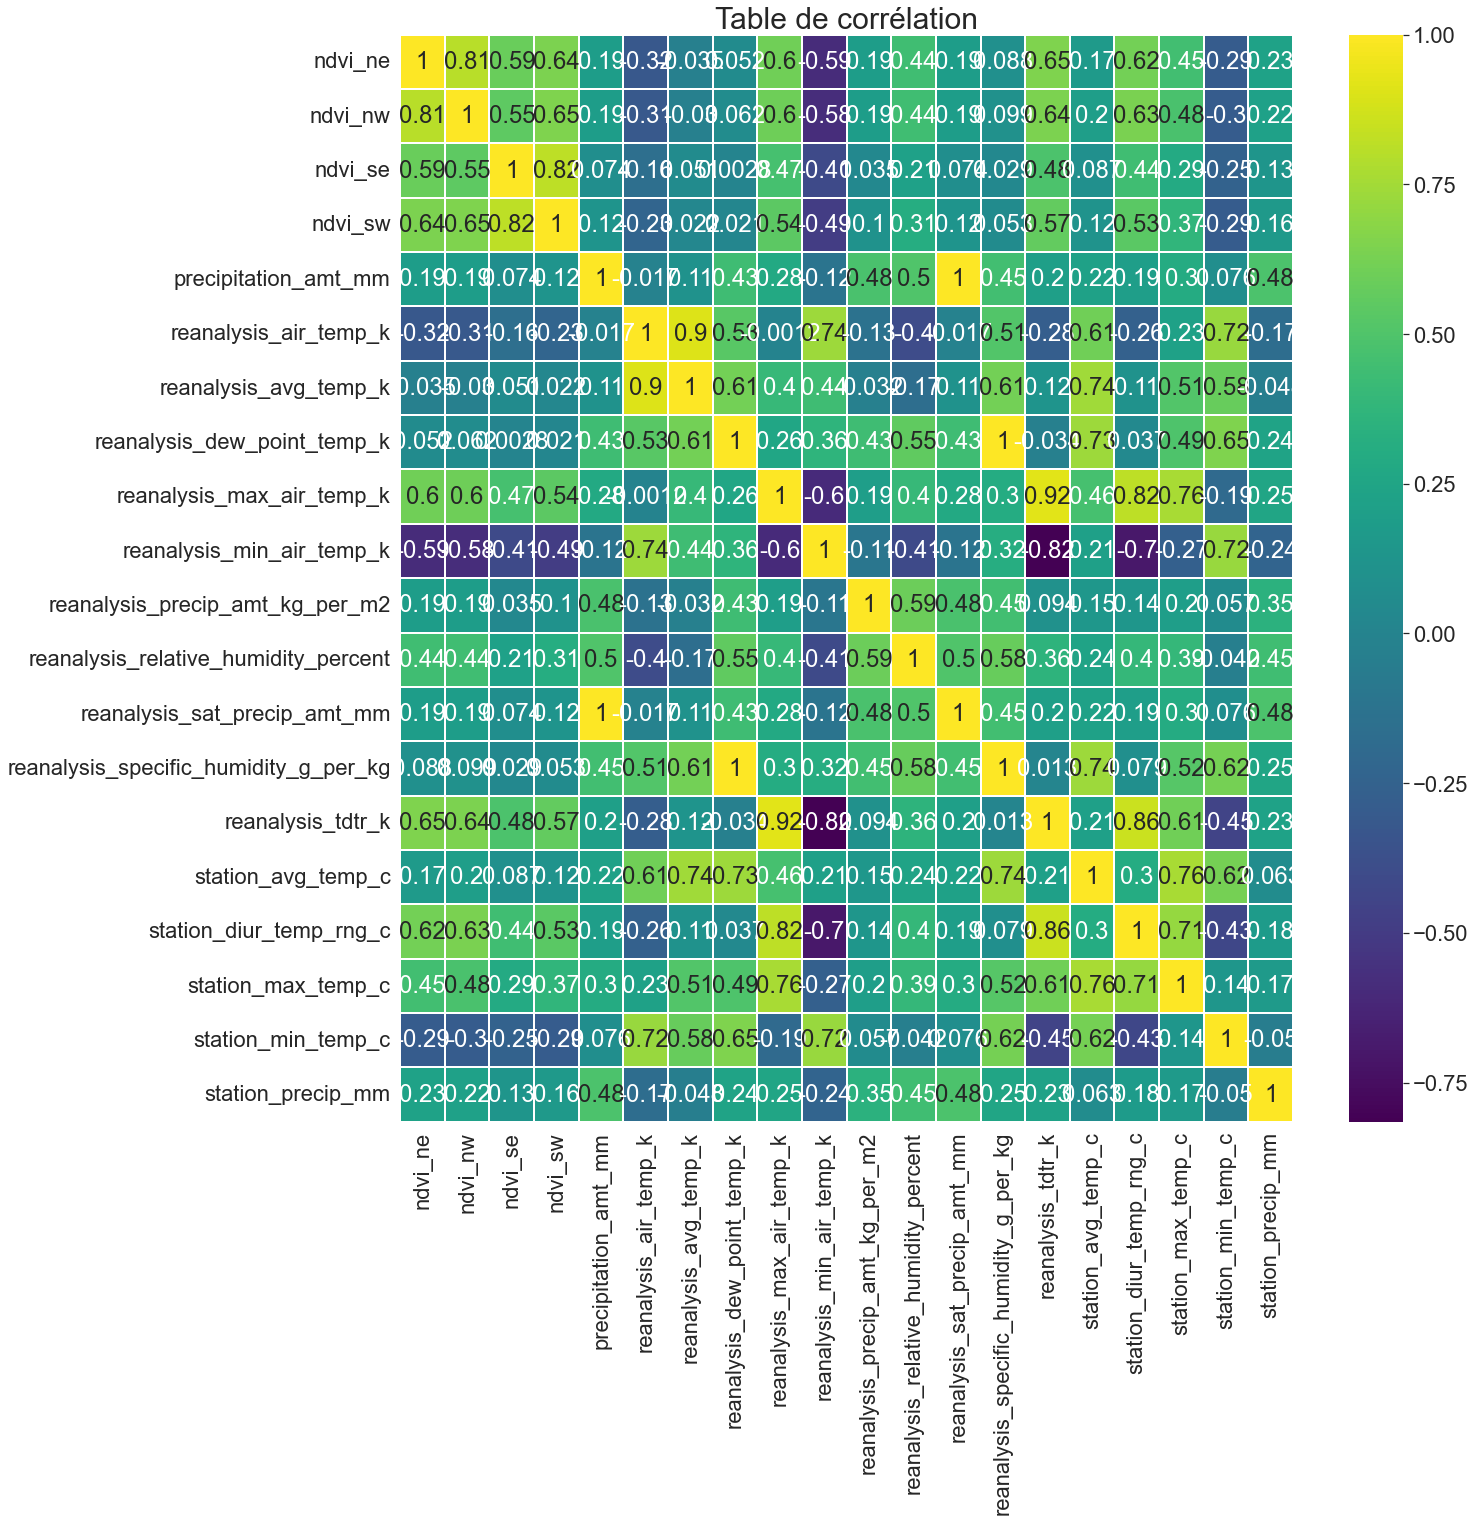

In [34]:
# graphique des correlations
plt.figure(figsize=(20, 20))

plt.title("Table de corrélation", fontsize=30)

sns.set(style="darkgrid", font_scale=2)
plt.xlabel("",fontsize=20)
plt.ylabel("",fontsize=20)

sns.heatmap(corr, 
            cmap='viridis',
            cbar=True,
            #vmax=1.0, vmin=-1.0,
            linewidths=0.3,
            annot=True,
            #annot_kws={"size": 8}, square=True
           );

### Normalisation

In [35]:
#NORMALISER APRES CORRELATION
data_clean = raw_data / raw_data.std(axis=0) # Normalizing the feature columns is recommended

# Création des models

## Splitting des données

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data_clean, y, test_size=0.2, random_state=5)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (1164, 20)
Test set: (292, 20)


## KNN

### Création

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# trouver le k optimal pour le nb de neighbors avant la declaration du knn ci dessous 

## Automatique
# définissons les paramètress
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_knn.fit(X_train, y_train)
#print(grid_knn.best_score_)
print(grid_knn.best_params_)


from sklearn.neighbors import KNeighborsClassifier

# déclaration de l'intention de knn
knn = KNeighborsClassifier(n_neighbors=grid_knn.best_params_["n_neighbors"])

# Entrainement du modèle
knn.fit(X_train, y_train)

D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI

D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

{'metric': 'euclidean', 'n_neighbors': 10}


D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

KNeighborsClassifier(n_neighbors=10)

### Evaluation

D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI

D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ml-tp\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

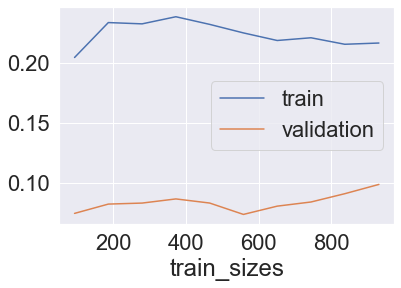

In [39]:
# Evaluation --------------

# Simple

#print('train score:', knn.score(X_train, y_train))
#print('test score:', knn.score(X_test, y_test))

from sklearn.metrics import f1_score, confusion_matrix, classification_report

y_test_predit = knn.predict(X_test)

confusion_matrix(y_test, y_test_predit)

# calcul de la précision, du rappel et du F-score
#print(classification_report(y_test, y_test_predit))


# Cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()

# Courbe d'apprentissage
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(knn, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

## Random Forest

### Création

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
# Entrainement du modèle
rf.fit(X_train, y_train)

### Evaluation

In [ ]:
# Calcul de score

print('train score:', rf.score(X_train, y_train))
print('test score:', rf.score(X_test, y_test))

y_test_rf_predit = rf.predict(X_test)

N_rf, train_score_rf, val_score_rf = learning_curve(rf, X_train, y_train, 
                                                    train_sizes=np.linspace(0.1, 1, 10),
                                                    cv=5, scoring='accuracy')

confusion_matrix(y_test, y_test_rf_predit)

plt.plot(N_rf, train_score_rf.mean(axis=1), label='train_rf')
plt.plot(N_rf, val_score_rf.mean(axis=1), label='validation_rf')
plt.xlabel('train_sizes')
plt.legend()

# calcul de la précision, du rappel et du F-score
print(classification_report(y_test, y_test_rf_predit))

cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy').mean()
pd.DataFrame(rf.feature_importances_).plot.bar(figsize=(12, 8))

## Arbre de décision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('train score:', dt.score(X_train, y_train))
print('test score:', dt.score(X_test, y_test))
y_test_dt_predit = dt.predict(X_test)

#confusion_matrix(y_test, y_test_dt_predit)

#print(classification_report(y_test, y_test_dt_predit))
from sklearn.tree import export_graphviz
FEATURE_NAMES = ["age", "sex", "cp", "trestbps", "chol", "fbs", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
#export_graphviz(dt, 'tree.dot', feature_names = FEATURE_NAMES)
!dot -Tpng tree.dot -o tree.png
import matplotlib.pyplot as plt
#import cv2 #pip install opencv-python opencv-python-headless
#%matplotlib inline
#img = cv2.imread('tree.png')
#plt.figure(figsize = (20, 20))
#plt.imshow(img)

## Regression linéaire

### Création

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

# Entrainement
linreg = LinearRegression()
linreg.fit(X_train_poly, y_train)

### Evaluation

In [ ]:
# Evaluation
y_train_predict = linreg.predict(X_train_poly)
y_test_predict = linreg.predict(X_test_poly)
mse_train = mean_squared_error(y_train, y_train_predict)
rmse_train = (np.sqrt(mse_train))
r2_train = r2_score(y_train, y_train_predict)
mse_test = mean_squared_error(y_test, y_test_predict)
rmse_test = (np.sqrt(mse_test))
r2_test = r2_score(y_test, y_test_predict)
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('mse du train {}'.format(mse_train), ' et test {}'.format(mse_test))
print("L'erreur quadratique moyenne du train est {}".format(rmse_train), " et test est {}".format(rmse_test))
print('le score R2 du train est {}'.format(r2_train), ' et test est {}'.format(r2_test))
print('\n')

# Conclusion